In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data_path
dir_data = './data/TW'
f_app_train = os.path.join(dir_data, '2020data_pchome1.CSV')
app_train = pd.read_csv(f_app_train)

In [2]:
app_train.head()

,member_id,postal_cd,date_cd,prod_id,goods,department,index,prod_Q,price,MSRP
0,15416142,831,day1,QAAD70-A9006TWM5-000,HP Officejet 7110 A3+ 網路高速印表機,3C,列 印,1,"$6,490",NaN
1,4663689,600,day1,QFAXAS-A900A38S1-001,HappyLife_桌上型微波爐架/烤箱置物架 (YV9799),生活,衛浴,1,$599,NaN
2,8097088,815,day1,QFAAJY-A9009W99R-000,dayneeds_輕型 45x45x160cm 四層電鍍波浪收納鐵架,生活,傢俱,1,$927,"$1,359"
3,15317712,708,day1,QAAS33-A900A7SR4-002,任天堂 Switch Joy-Con 四合一鋁合金 手把充電座(兩色可選),3C,電 玩,1,$690,$990
4,15438512,704,day1,CGAACT-A80423382-005,big5,運動戶外,汽百/記錄器,1,"$1,055","$1,600"


In [3]:
# data processing
import math

price_new = []
MSRP_new = []

for i in app_train.index:
#     print(type(app_train['price'][i]))
#     print(type(app_train['MSRP'][i]))
    dollars = app_train['price'][i].replace("$","").replace(",","")
    price_new.append(float(dollars))
    if type(app_train['MSRP'][i]) == float:
        if math.isnan(app_train['MSRP'][i]):
            dollars = app_train['price'][i].replace("$","").replace(",","")
            MSRP_new.append(float(dollars))
    else:
        dollars = app_train['MSRP'][i].replace("$","").replace(",","")
        MSRP_new.append(float(dollars))
        
app_train['price_new'] = price_new
app_train['MSRP_new'] = MSRP_new

app_train = app_train.drop(columns=['MSRP', 'price'])
app_train = app_train.rename(columns={"price_new": "price", "MSRP_new": "MSRP"})

app_train.head()

,member_id,postal_cd,date_cd,prod_id,goods,department,index,prod_Q,price,MSRP
0,15416142,831,day1,QAAD70-A9006TWM5-000,HP Officejet 7110 A3+ 網路高速印表機,3C,列 印,1,6490.0,6490.0
1,4663689,600,day1,QFAXAS-A900A38S1-001,HappyLife_桌上型微波爐架/烤箱置物架 (YV9799),生活,衛浴,1,599.0,599.0
2,8097088,815,day1,QFAAJY-A9009W99R-000,dayneeds_輕型 45x45x160cm 四層電鍍波浪收納鐵架,生活,傢俱,1,927.0,1359.0
3,15317712,708,day1,QAAS33-A900A7SR4-002,任天堂 Switch Joy-Con 四合一鋁合金 手把充電座(兩色可選),3C,電 玩,1,690.0,990.0
4,15438512,704,day1,CGAACT-A80423382-005,big5,運動戶外,汽百/記錄器,1,1055.0,1600.0


In [4]:
# calculate DFM data

df = app_train.copy()

df1 = df.groupby('member_id').agg({'date_cd': np.size})
df2 = df.groupby('member_id')['price'].sum()
df3 = df.groupby('member_id')['MSRP'].sum()

df1['Monetary'] = df2
df1['MSRP_Total'] = df3
df3 = df1.rename(columns={'date_cd':'Frequency'})

discount = []

for i in df3.index:
    discount.append(1 - round(df3['Monetary'][i]/df3['MSRP_Total'][i], 3))

df3['Discount'] = discount

df4 = pd.DataFrame()
df4['Discount'] = df3['Discount']
df4['Frequency'] = df3['Frequency']
df4['Monetary'] = df3['Monetary']
df4.head()

,Discount,Frequency,Monetary
member_id,,,
91,0.000,2,2900.0
549,0.091,1,2090.0
1655,0.147,1,2799.0
2241,0.503,2,732.0
2988,0.537,2,448.0


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\user\AppData\Roaming\Python\Python36\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


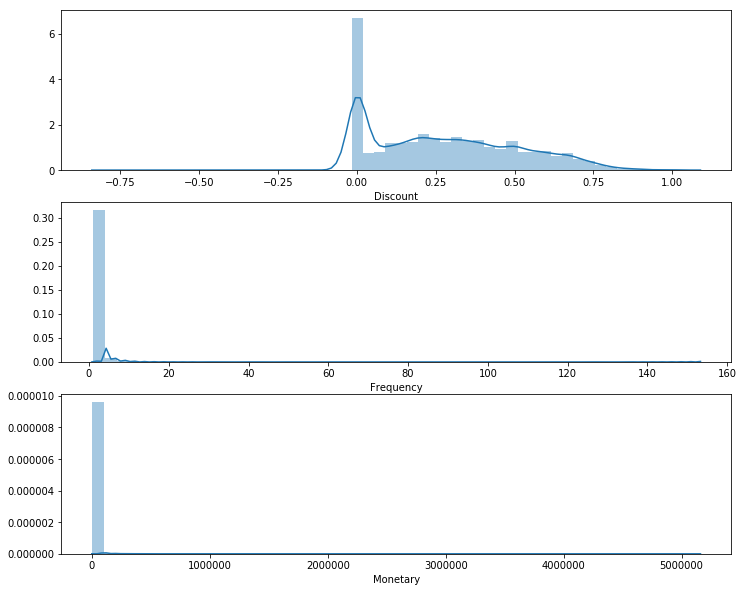

In [5]:
# Plot DFM distributions

plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(df4['Discount'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(df4['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(df4['Monetary'])
# Show the plot
plt.show()

In [6]:
# Calculate z score
from scipy.stats import zscore

df = df4.apply(zscore)

df4['D_z-score'] = df['Discount']
df4['F_z-score'] = df['Frequency']
df4['M_z-score'] = df['Monetary']
df4.head()

,Discount,Frequency,Monetary,D_z-score,F_z-score,M_z-score
member_id,,,,,,
91,0.000,2,2900.0,-1.190123,0.160412,-0.081711
549,0.091,1,2090.0,-0.798055,-0.299018,-0.104608
1655,0.147,1,2799.0,-0.556782,-0.299018,-0.084566
2241,0.503,2,732.0,0.977024,0.160412,-0.142995
2988,0.537,2,448.0,1.123511,0.160412,-0.151023


In [7]:
# calculate VS(Value Score)＝ 1.25*ZD + 1* ZF + 1.5* ZM, Weight of DFM
vsScore = []

for i in df4.index:
    vsScore.append(1.25 * df4['D_z-score'][i] + 1 * df4['F_z-score'][i] + 1.5 * df4['M_z-score'][i])

df4['ValueScore'] = vsScore
df4.head()

,Discount,Frequency,Monetary,D_z-score,F_z-score,M_z-score,ValueScore
member_id,,,,,,,
91,0.000,2,2900.0,-1.190123,0.160412,-0.081711,-1.449809
549,0.091,1,2090.0,-0.798055,-0.299018,-0.104608,-1.453499
1655,0.147,1,2799.0,-0.556782,-0.299018,-0.084566,-1.121845
2241,0.503,2,732.0,0.977024,0.160412,-0.142995,1.167199
2988,0.537,2,448.0,1.123511,0.160412,-0.151023,1.338266


In [8]:
# Rank by Value Score 
df4['Rank_ValueScore'] = df4['ValueScore'].rank(method='min', ascending=False)
df5 = df4.sort_values(by='ValueScore', ascending=False)
result = df5.reset_index()
result.index += 1
result.head()

,member_id,Discount,Frequency,Monetary,D_z-score,F_z-score,M_z-score,ValueScore,Rank_ValueScore
1,2400440,0.000,2,5160000.0,-1.190123,0.160412,145.697324,217.218743,1.0
2,14255682,0.000,132,1084578.0,-1.190123,59.886310,30.494771,104.140812,2.0
3,16574617,0.000,153,450500.0,-1.190123,69.534340,12.570884,86.903011,3.0
4,17871662,0.008,27,1756000.0,-1.155656,11.646161,49.474285,84.413019,4.0
5,11521175,0.025,95,657410.0,-1.082412,42.887400,18.419741,69.163996,5.0


In [14]:
# Top 20 % valuable customer
valuable = []
for i in result.index:
    if i <= (len(result.index) * 0.2):
        valuable.append('Valuable Customer')
    else:
        valuable.append('Potential Customer')

result['VS Level'] = valuable

result.to_csv ('DFM_Score.csv', index = False, header=True)

result


,member_id,Discount,Frequency,Monetary,D_z-score,F_z-score,M_z-score,ValueScore,Rank_ValueScore,VS Level
1,2400440,0.000,2,5160000.0,-1.190123,0.160412,145.697324,217.218743,1.0,Valuable Customer
2,14255682,0.000,132,1084578.0,-1.190123,59.886310,30.494771,104.140812,2.0,Valuable Customer
3,16574617,0.000,153,450500.0,-1.190123,69.534340,12.570884,86.903011,3.0,Valuable Customer
4,17871662,0.008,27,1756000.0,-1.155656,11.646161,49.474285,84.413019,4.0,Valuable Customer
5,11521175,0.025,95,657410.0,-1.082412,42.887400,18.419741,69.163996,5.0,Valuable Customer
6,17719417,0.000,2,1146000.0,-1.190123,0.160412,32.231026,47.019296,6.0,Valuable Customer
7,14685763,0.028,35,720507.0,-1.069487,15.321601,20.203344,44.289758,7.0,Valuable Customer
8,14114293,0.287,55,470590.0,0.046400,24.510201,13.138780,44.276372,8.0,Valuable Customer
9,14875891,0.141,42,475780.0,-0.582633,18.537611,13.285489,37.737554,9.0,Valuable Customer
10,8590355,0.005,64,224250.0,-1.168581,28.645071,6.175331,36.447340,10.0,Valuable Customer
